In [62]:
%matplotlib notebook
from __future__ import print_function
from IPython.display import display

import numpy as np

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='ticks')
sns.set(style='whitegrid')
from mpl_toolkits.mplot3d import Axes3D

from sklearn.svm import SVC
import time

# from ipywidgets import interact, interactive, fixed, interact_manual
# import ipywidgets as widgets
# import pandas as pd


<IPython.core.display.Javascript object>


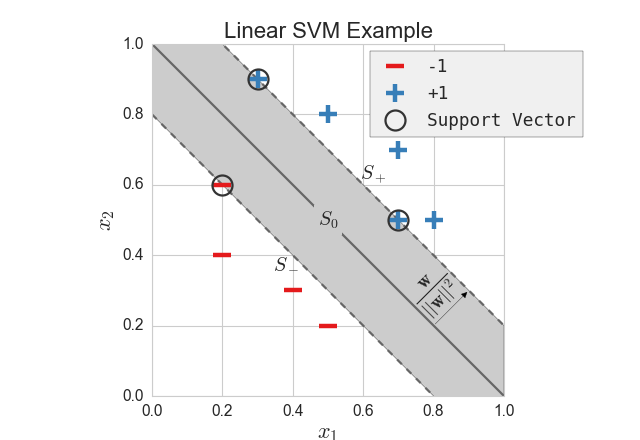

In [17]:
X = np.array([[0.2,0.4],
              [0.8,0.5],
              [0.4,0.3],
              [0.5,0.2],
              [0.2,0.6],
              [0.7,0.7],
              [0.3,0.9],
              [0.7,0.5],
              [0.5,0.8]])
Y = np.atleast_2d([1 if np.sum(xi) > 1 else -1 for xi in X]).T

svc = SVC(C=1000, kernel='linear', gamma='auto', shrinking=True, probability=False, tol=1e-12, cache_size=8000, max_iter=-1, decision_function_shape=None, random_state=None)
_ = svc.fit(X,Y.reshape(len(Y),))
w = svc.coef_.flatten()
b = svc.intercept_
sv = svc.support_vectors_
wnorm = np.linalg.norm(w)

fig,ax = plt.subplots(1)

x1 = np.linspace(0,1,2)
x2 = (-b - w[0]*x1)/w[1]
x2m = (-1-b - w[0]*x1)/w[1]
x2p = (1-b - w[0]*x1)/w[1]

x1mid = np.average(x1)
x2mid = np.average(x2m)

ax.fill_between(x1,x2m,x2p, facecolor='#CCCCCC')
ax.plot(x1, x2m, c='#666666', ls='dashed', lw=2)
ax.plot(x1, x2p, c='#666666', ls='dashed', lw=2)
ax.plot(x1, x2, c='#666666', lw=2)

posIdxs = np.where(Y > 0)[0]
negIdxs = np.where(Y < 0)[0]
ax.plot(X[negIdxs,0],X[negIdxs,1],c='#e41a1c',marker='_',ms=16,mew=4,lw=0,label='-1')
ax.plot(X[posIdxs,0],X[posIdxs,1],c='#377eb8',marker='+',ms=16,mew=4,lw=0,label='+1')
x = np.linspace(0,1,2)

ax.set_xlim(0,1)
ax.set_xlabel('$x_1$',fontsize=20)
ax.set_ylim(0,1)
ax.set_ylabel('$x_2$',fontsize=20)
ax.tick_params(axis='both', which='major', labelsize=14)
ax.set_title('Linear SVM Example',fontsize=20)
ax.plot(sv[:,0],sv[:,1],marker='o',ms=18,mew=2,lw=0,fillstyle='none',c='#333333',label='Support Vector')

legend = plt.legend(bbox_to_anchor=(0.62, 0.98), loc=2, borderaxespad=0., frameon=True, numpoints=1, fontsize=16)
plt.setp(legend.texts, family='monospace')
legend.get_frame().set_edgecolor('#000000')
legend.get_frame().set_facecolor('#F0F0F0')

bbox_props = dict(boxstyle="square,pad=0.2", fc="#CCCCCC", lw=0)
textS0Loc = (0.5,0.5)
textSmLoc = (0.38,0.38)
textSpLoc = (0.63,0.63)
arrowLoc = (0.8,0.2)

ax.text(textS0Loc[0],textS0Loc[1],r'$S_0$', ha='center', va='center', fontsize=18, rotation=0, bbox=bbox_props)
ax.text(textSmLoc[0],textSmLoc[1],r'$S_-$', ha='center', va='center', fontsize=18, rotation=0)
ax.text(textSpLoc[0],textSpLoc[1],r'$S_+$', ha='center', va='center', fontsize=18, rotation=0)

ax.annotate('', xy=arrowLoc, xytext=(arrowLoc[0]+w[0]/wnorm**2,arrowLoc[1]+w[1]/wnorm**2),arrowprops=dict(facecolor='black', arrowstyle='<|-'))
ax.text(arrowLoc[0]-0.08,arrowLoc[1]+.125,r'$\frac{\mathbf{w}}{||\mathbf{w}||^2}$', rotation=45, fontsize=24)

ax.set_aspect('equal')

<IPython.core.display.Javascript object>


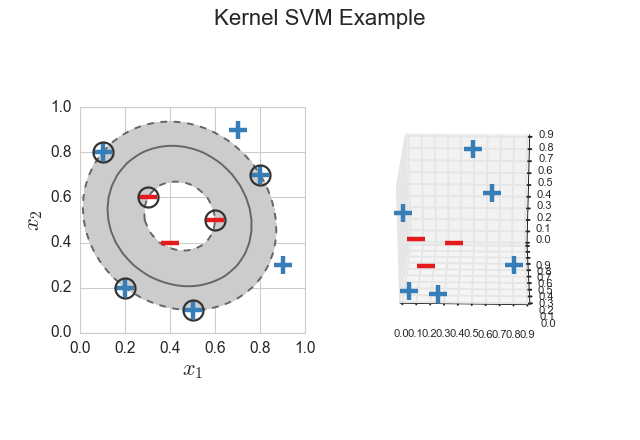

1.0


In [179]:
# np.random.seed(5)
#X = np.random.rand(10,2)
X = np.array([[0.6,0.5],
              [0.7,0.9],
              [0.8,0.7],
              [0.2,0.2],
              [0.1,0.8],
              [0.5,0.1],
              [0.9,0.3],
              [0.4,0.4],
              [0.3,0.6]])
Y = np.atleast_2d([1 if np.sum((xi-0.5)**2) > 0.3**2 else -1 for xi in X]).T

fig = plt.figure()
ax = []
ax.append(fig.add_subplot(121,aspect='equal'))
ax.append(fig.add_subplot(122,projection='3d', aspect='equal'))
   
posIdxs = np.where(Y > 0)[0]
negIdxs = np.where(Y < 0)[0]
ax[0].plot(X[negIdxs,0],X[negIdxs,1],c='#e41a1c',marker='_',ms=16,mew=4,lw=0,label='-1')
ax[0].plot(X[posIdxs,0],X[posIdxs,1],c='#377eb8',marker='+',ms=16,mew=4,lw=0,label='+1')

svc = SVC(C=1e5, kernel='rbf', gamma='auto', shrinking=False, tol=1e-12, cache_size=8000, max_iter=-1, random_state=None)
_ = svc.fit(X,Y.reshape(len(Y),))
sv = svc.support_vectors_

ax[0].plot(sv[:,0],sv[:,1],marker='o',ms=18,mew=2,lw=0,fillstyle='none',c='#333333',label='Support Vector')

ax[0].set_xlim(0,1)
ax[0].set_xlabel('$x_1$',fontsize=20)
ax[0].set_ylim(0,1)
ax[0].set_ylabel('$x_2$',fontsize=20)
ax[0].tick_params(axis='both', which='major', labelsize=14)

y, x = np.meshgrid(np.arange(0.,1.,0.05),np.arange(0.,1.,0.01))
z = svc.decision_function(zip(x.flatten(),y.flatten()))
z = z.reshape(x.shape)

ax[0].contour(x, y, z, levels=[-1,0.0,1], colors='#666666', linestyles=['dashed','solid','dashed'])
ax[0].contourf(x, y, z, levels=[-1,1], colors='#CCCCCC')

## TODO: Figure out how to appropriately lift the 2D data into the RBF feature space, the method below
## should be correct for a degree 2 polynomial, however that kernel is not capable of separating the data

xTransformed = np.zeros((len(X),3))
for i,xi in enumerate(X):
    xTransformed[i,:] = [xi[0]**2,np.sqrt(2)*xi[0]*xi[1],xi[1]**2]

ax[1].plot(xTransformed[negIdxs,0],xTransformed[negIdxs,1],xTransformed[negIdxs,2],c='#e41a1c',marker='_',ms=16,mew=4,lw=0,label='-1')
ax[1].plot(xTransformed[posIdxs,0],xTransformed[posIdxs,1],xTransformed[posIdxs,2],c='#377eb8',marker='+',ms=16,mew=4,lw=0,label='+1')
    

# ax[1].set_xlim(0,1)
# ax[1].set_xlabel('$x_1$',fontsize=20)
# ax[1].set_ylim(0,1)
# ax[1].set_ylabel('$x_2$',fontsize=20)
# ax[1].tick_params(axis='both', which='major', labelsize=14)

ax[1].set_aspect('equal')
fig.suptitle('Kernel SVM Example',fontsize=20)

In [ ]:
def volumeFunction(x0,x1,x2):
    x = np.sqrt(x0).flatten()
    y = np.sqrt(x2).flatten()
    return svc.decision_function(zip(x,y)).reshape(x0.shape)

x, y, z = np.mgrid[0:1:11j, 0:1:11j, 0:1:11j]
vol = volumeFunction(x, y, z)
verts, faces = measure.marching_cubes_classic(vol, 0, spacing=(0.1, 0.1, 0.1))

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_trisurf(verts[:, 0], verts[:,1], faces, verts[:, 2], color='#CCCCCC', lw=0)
ax.plot(xTransformed[negIdxs,0],xTransformed[negIdxs,1],xTransformed[negIdxs,2],c='#e41a1c',marker='_',ms=16,mew=4,lw=0,label='-1')
ax.plot(xTransformed[posIdxs,0],xTransformed[posIdxs,1],xTransformed[posIdxs,2],c='#377eb8',marker='+',ms=16,mew=4,lw=0,label='+1')
plt.show()